## SIF Mamdani
### Sistem Penerimaan Beasiswa

In [21]:
import numpy as np
import skfuzzy
from skfuzzy import control as ctrl

In [22]:
%matplotlib inline

In [23]:
# antacedent

nilai = ctrl.Antecedent(np.arange(0,4.01,0.05),'Nilai')
pendapatan = ctrl.Antecedent(np.arange(0,20.01,0.5),'Pendapatan')

# Consequent

beasiswa = ctrl.Consequent(np.arange(0,3.01,0.05),'Beasiswa')

In [24]:
# Membership

nilai['rendah'] = skfuzzy.trimf(nilai.universe,[0,0,2])
nilai['sedang'] = skfuzzy.trimf(nilai.universe,[1.5,2.5,3.5])
nilai['tinggi'] = skfuzzy.trimf(nilai.universe,[3,4,4])

pendapatan['rendah'] = skfuzzy.trapmf(pendapatan.universe,[0,0,2,4])
pendapatan['cukup'] = skfuzzy.trapmf(pendapatan.universe,[2,6,9,13])
pendapatan['tinggi'] = skfuzzy.trapmf(pendapatan.universe,[10,14,20,20])

# consequent
beasiswa['sedikit'] = skfuzzy.trapmf(beasiswa.universe,[0,0,1,2])
beasiswa['banyak'] = skfuzzy.trapmf(beasiswa.universe,[1,2,3,3])

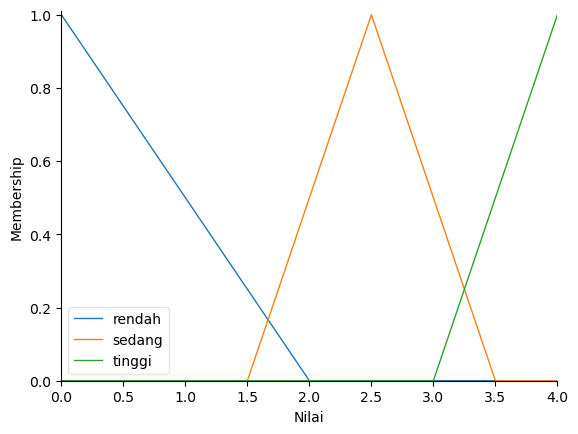

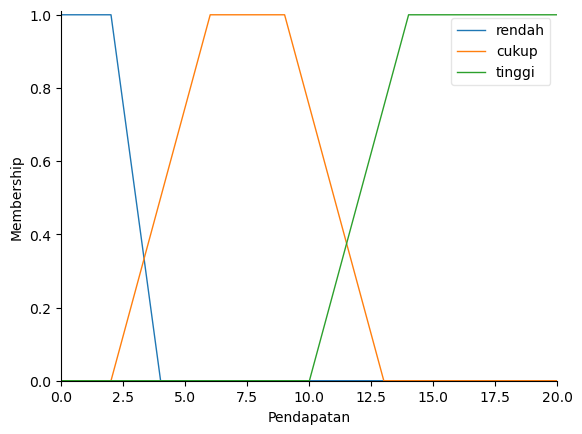

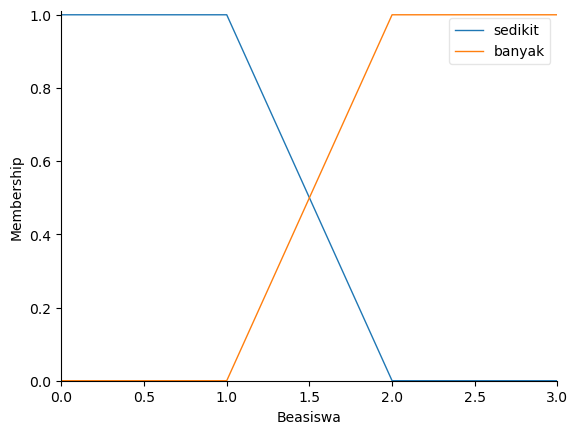

In [25]:
nilai.view()
pendapatan.view()
beasiswa.view()

In [26]:
# Rules 

R1 = ctrl.Rule(nilai['rendah'] & pendapatan['rendah'],beasiswa['sedikit'])
R2 = ctrl.Rule(nilai['sedang'] & pendapatan['cukup'],beasiswa['sedikit'])
R3 = ctrl.Rule(nilai['tinggi'] & pendapatan['cukup'],beasiswa['sedikit'])
R4 = ctrl.Rule(nilai['tinggi'] & pendapatan['rendah'],beasiswa['banyak'])

R5 = ctrl.Rule(nilai['rendah'],beasiswa['sedikit'])

In [27]:
print(R1)
print(R2)
print(R3)
print(R4)
print(R5)

IF Nilai[rendah] AND Pendapatan[rendah] THEN Beasiswa[sedikit]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF Nilai[sedang] AND Pendapatan[cukup] THEN Beasiswa[sedikit]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF Nilai[tinggi] AND Pendapatan[cukup] THEN Beasiswa[sedikit]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF Nilai[tinggi] AND Pendapatan[rendah] THEN Beasiswa[banyak]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF Nilai[rendah] THEN Beasiswa[sedikit]
	AND aggregation function : fmin
	OR aggregation function  : fmax


In [28]:
beasiswaMamdani = ctrl.ControlSystem([R1,R2,R3,R4])
beasiswaDecision = ctrl.ControlSystemSimulation(beasiswaMamdani)

In [29]:
# Test System

beasiswaDecision.input['Nilai'] = 3.5
beasiswaDecision.input['Pendapatan'] = 2.5
beasiswaDecision.compute()
print(beasiswaDecision.output)

OrderedDict([('Beasiswa', 1.9096404215747054)])


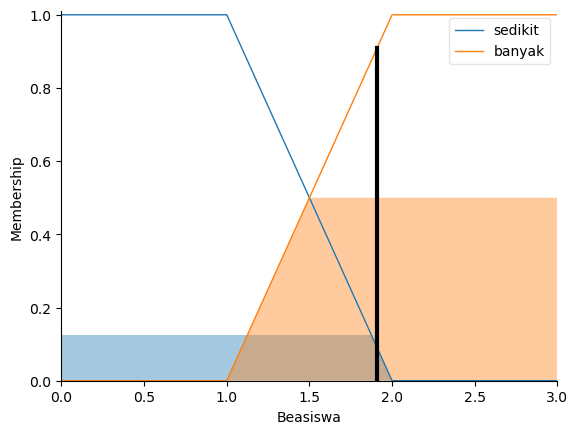

In [30]:
beasiswa.view(sim=beasiswaDecision)